In [ ]:
debug = True

In [227]:
from PIL import Image
import numpy as np

In [237]:
from pprint import pprint
from ipywidgets import widgets
from ipywidgets.widgets import interact
from IPython.display import display

In [67]:
import matplotlib.image as mpimg

In [68]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [79]:
%matplotlib notebook

# Select working data set

In [ ]:
%gui qt

In [ ]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name."""
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
                                            dir, 
                                            filter = "TIF (*.tif);; All files (*)")
    return fname

In [ ]:
# Default folder
default_dir = '/Volumes/Macintosh HD 2/IPTS/TOF_Si_powder'

In [ ]:
%gui qt
list_fname = gui_fname(dir = default_dir)

Make sure files are sorted the right way !

In [ ]:
if debug:
    pprint(list_fname)
    print()
    pprint("Loaded %d files" %(len(list_fname)))

Load images

In [234]:
nbr_images = len(list_fname)
images = []

w = widgets.IntProgress()
w.max = nbr_images
display(w)

for _index in range(nbr_images):
        
        _file = list_fname[_index]
#        _image = mpimg.imread(_file)
        _image = Image.open(_file)
        _image = np.asarray(_image)
        images.append(_image)

        w.value = _index
    

# Normalize images
Using average number of counts from OB ROI / images and divide each pixel of images by normalized coefficient

## OB is part of the image

        b. calculate average counts
        c. divide each pixel of sample by OB avereage value

### a. Select region of the image that is OB and sample

<IPython.core.display.Javascript object>


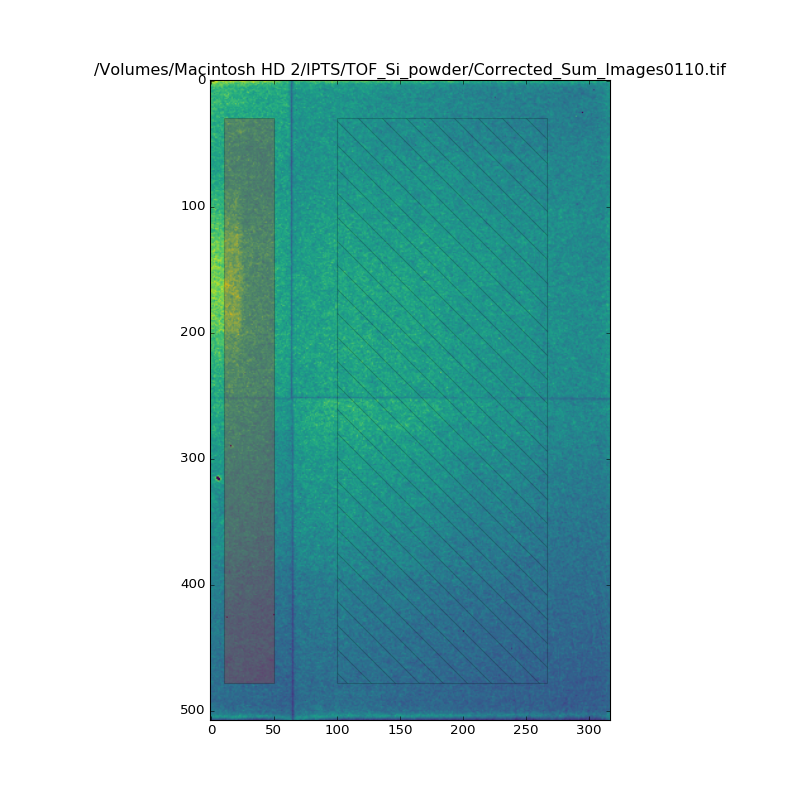

[[10, 50, 30, 478], [100, 267, 30, 478]]

In [293]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_select_ob_sample_regions(file_index, 
                                        ob_left, ob_right, ob_top, ob_bottom,
                                        s_left, s_right, s_top, s_bottom):

    _data = images[file_index]

    fig1 = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(_data, cmap='viridis')
    ax_img.set_title(list_fname[file_index])

    ax_img.add_patch(Rectangle((ob_left, ob_bottom), (ob_right-ob_left), (ob_top-ob_bottom), 
                               fill=True, 
#                               hatch='\\',,
                               alpha=0.2,
                              facecolor='red'))

    ax_img.add_patch(Rectangle((s_left, s_bottom), (s_right - s_left), (s_top - s_bottom), 
                              fill = False,
                               hatch = '\\',
                              alpha = 0.2,
                              facecolor = 'blue'))

    return [[ob_left, ob_right, ob_top, ob_bottom], [s_left, s_right, s_top, s_bottom]]


crop = interact(plot_images_to_select_ob_sample_regions,
               file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=100, description='Image Index'),

            ob_left = widgets.IntSlider(min=0, max=width, step=1, value=10, description='left OB'),
           ob_right = widgets.IntSlider(min=0, max=width, step=1, value=50, description='right OB'),
           ob_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top OB'),
           ob_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom OB'),

            s_left = widgets.IntSlider(min=0, max=width, step=1, value=100, description='left sample'),
           s_right = widgets.IntSlider(min=0, max=width, step=1, value=width-50, description='right sample'),
           s_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top sample'),
           s_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom sample')) 


In [272]:
[ob_selection, s_selection] = crop.widget.result
print("Region selected:")
print()
print("-> Open Beam: ")
print("      left: %d" %ob_selection[0])
print("     right: %d" %ob_selection[1])
print("       top: %d" %ob_selection[2])
print("    bottom: %d" %ob_selection[3])
print()
print("-> Sample: ")
print("      left: %d" %s_selection[0])
print("     right: %d" %s_selection[1])
print("       top: %d" %s_selection[2])
print("    bottom: %d" %s_selection[3])


Region selected:

-> Open Beam: 
      left: 10
     right: 50
       top: 30
    bottom: 478

-> Sample: 
      left: 100
     right: 267
       top: 30
    bottom: 440


### b. Calculate average counts in OB region (for each image) 

In [273]:
[ob_left, ob_right, ob_top, ob_bottom] = ob_selection

In [319]:
ob_average_counts = []
for _index in range(nbr_images):
    
    _data = images[_index]
    
    #region selected
    _ob = _data[ob_top: ob_bottom, ob_left: ob_right]
    _mean_value = np.mean(_ob)
    
    ob_average_counts.append(_mean_value)

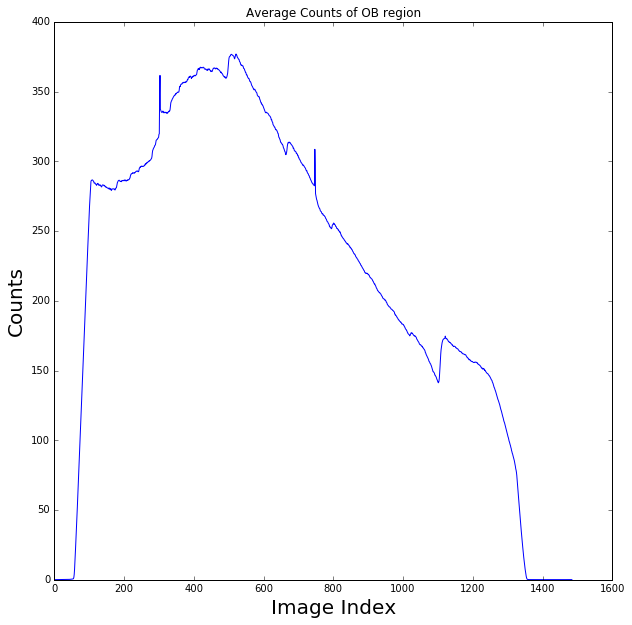

In [324]:
# display to check values
fig2 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), ob_average_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Average Counts of OB region")



### c. Crop images to keep only sample region

#### 1. Keep only the range of images of interest

In [323]:
%matplotlib inline

[100, 1321]

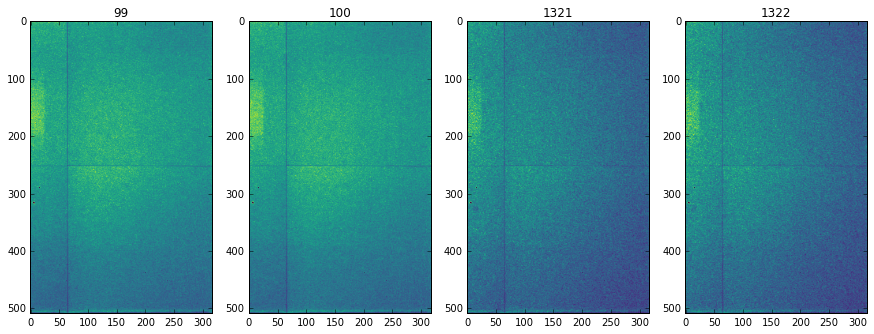

In [326]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_keep(file_index_start, file_index_end):
    """displays the first image excluded and kept, and the last image kept and excluded"""
    
    _data1_out = images[file_index_start - 1]
    _data1_in = images[file_index_start]
    
    _data2_in = images[file_index_end]
    _data2_out = images[file_index_end + 1]

    fig3 = plt.figure(figsize=(15, 50))

    ax_img1_out = plt.subplot(141)
    ax_img1_out.imshow(_data1_out, cmap='viridis')
    ax_img1_out.set_title("%d" %(file_index_start - 1))
    #ax_img1_out.set_title("Last image excluded: %s" %list_fname[file_index_start - 1])

    ax_img1_in = plt.subplot(142)
    ax_img1_in.imshow(_data1_in, cmap='viridis')
    ax_img1_in.set_title("%d" %(file_index_start))
    #ax_img1_in.set_title(list_fname[file_index_start - 1])

    ax_img2_in = plt.subplot(143)
    ax_img2_in.imshow(_data2_in, cmap='viridis')
    ax_img2_in.set_title("%d" %(file_index_end))
    #ax_img2_out.set_title("Last image excluded: %s" %list_fname[file_index_end])

    ax_img2_out = plt.subplot(144)
    ax_img2_out.imshow(_data2_out, cmap='viridis')
    ax_img2_out.set_title("%d" %(file_index_end + 1))
    #ax_img2_in.set_title(list_fname[file_index_end + 1])

    return [file_index_start, file_index_end]
    
file_range = interact(plot_images_to_keep,
               file_index_start = widgets.IntSlider(min=0, max=nbr_images, step=1, value=100, description='First Image to Keep'),
               file_index_end = widgets.IntSlider(min=0, max=nbr_images, step=1, value=1321, description='First Image to Keep'))


In [327]:
[file_index_start, file_index_end] = file_range.widget.result

In [342]:
print("Before, we had %d" %len(images))
new_images = images[file_index_start: file_index_end]
new_ob_mean = ob_average_counts[file_index_start: file_index_end]
print("After, we have %d" %len(new_images))

Before, we had 1485
After, we have 1221


#### 2. Keep only the region of interest 

In [332]:
[s_left, s_right, s_top, s_bottom] = s_selection

In [333]:
new_images_cropped = []
for _image in new_images:
    _image_cropped = _image[s_top: s_bottom, s_left: s_right]
    new_images_cropped.append(_image_cropped)

In [340]:
print("number of images cropped: %d" %(len(new_images_cropped)))
print("Size of each image is (height, width):", (new_images_cropped[0].shape))

number of images cropped: 1221
Size of each image is (height, width): (410, 167)


### d. divide sample by OB average value

In [343]:
new_images_cropped_normalized = []
for _index, _image in enumerate(new_images_cropped):
    _mean_ob = new_ob_mean[_index]
    _image_normalized = _image / _mean_ob
    new_images_cropped_normalized.append(_image_normalized)

Check results !

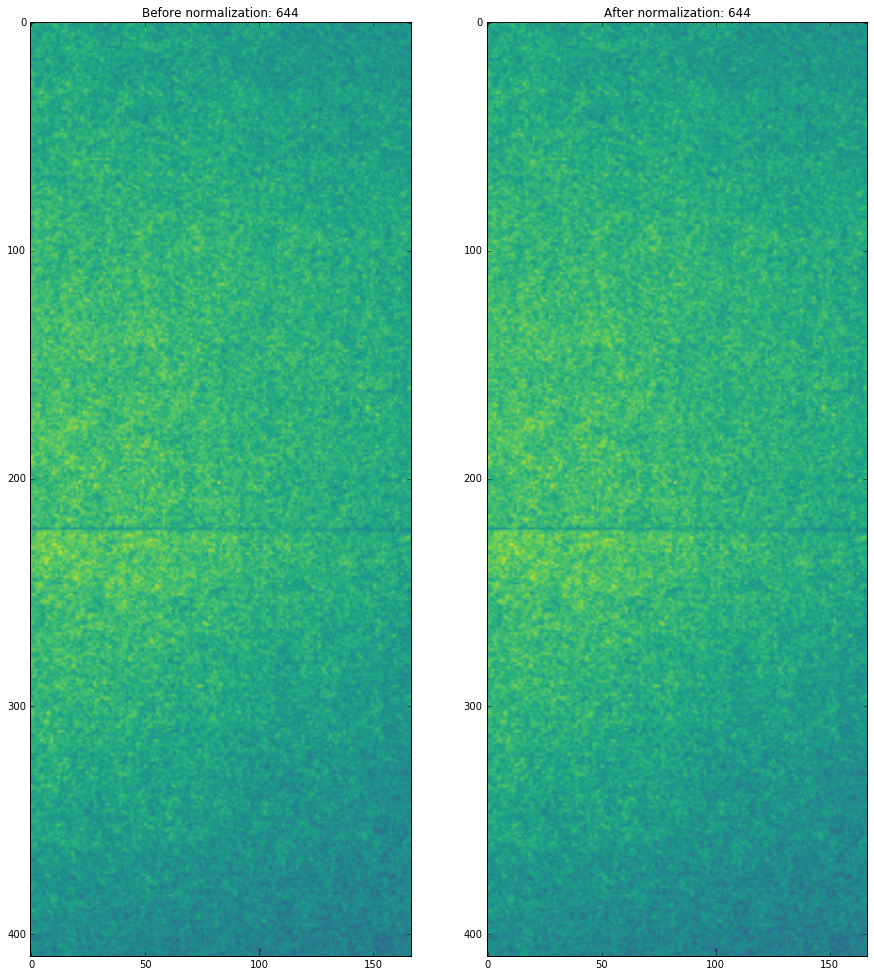

In [344]:
# select Sample region
nbr_images = len(new_images_cropped_normalized)

def plot_images_before_and_after_normalization(file_index):
    """Display the sample region before and after normalization"""
    
    _sample_raw = new_images_cropped[file_index]
    _sample_norm = new_images_cropped_normalized[file_index]

    fig4 = plt.figure(figsize=(15, 30))

    ax_img1 = plt.subplot(121)
    ax_img1.imshow(_sample_raw, cmap='viridis')
    ax_img1.set_title("Before normalization: %d" %(file_index))
    
    ax_img2 = plt.subplot(122)
    ax_img2.imshow(_sample_norm, cmap='viridis')
    ax_img2.set_title("After normalization: %d" %(file_index))
    
check_normalization = interact(plot_images_before_and_after_normalization,
                   file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=0, 
                                              description='Image Index'))



## OB are in their own files 

NOT IMPLEMENTED YET !!

## Display Counts vs file index 

### 1. for each pixels

### 2. for binning of pixels defined 

In [347]:
# how to bin the pixels
pixel_binning = 10 

Create 2D array of indices that will allow to quickly find the position of a pixel into the rebin array

    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [1,0] [1,0] [1,1] [1,1] [1,2] ..
     ...

In [352]:
print("width: %d" %width)
x_axis_bin = np.arange(0, width, pixel_binning)
print(x_axis_bin)

print("height: %d" %height)
y_axis_bin = np.arange(0, height, pixel_binning)
print(y_axis_bin)

width: 317
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310]
height: 508
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500]


Remove range of pixels that don't have a full bin

In [384]:
_bin_new_images_cropped_normalized = []
for _image in new_images_cropped_normalized:
    _tmp_image = _image[0: y_axis_bin[-1], 0: x_axis_bin[-1]]
    _bin_new_images_cropped_normalized.append(_tmp_image)

In [390]:
[bin_height, bin_width] = _bin_new_images_cropped_normalized[0].shape

Bin all images

In [407]:
w = widgets.IntProgress()
w.max = len(_bin_new_images_cropped_normalized)
display(w)

_bin_image = np.zeros((len(y_axis_bin), len(x_axis_bin)))
_bin_images = []

_index = 0
for _image in _bin_new_images_cropped_normalized:
    for _x_index in range(len(x_axis_bin) - 2):
        for _y_index in range(len(y_axis_bin) - 2):
            _sub_array = _image[y_axis_bin[_y_index]:y_axis_bin[_y_index + 1], 
                                x_axis_bin[_x_index]:x_axis_bin[_x_index + 1]]
            _sub_array_mean = np.mean(_sub_array)
            _bin_image[_y_index, _x_index] = _sub_array_mean
    _bin_images.append(_bin_image)

    _index += 1
    w.value = _index


/Users/j35/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/j35/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
def plot_counts_binned(y_bin, x_bin):
    """Display the x_bin and y_bin counts over all the files"""
    
    _counts_bin = []
    for _image in _bin_images:
        _counts_bin.append(_image[y_bin, x_bin])
    
    fig5 = plt.figure(figsize=(20, 20))

    ax_img1 = plt.subplot(121)
    ax_img1.plot(_counts_bin)
    ax_img1.set_title("Counts vs File Index")
    
    
counts_binned = interact(plot_counts_binned,
                       y_bin = widgets.IntSlider(min=0, max=len(y_axis_bin), step=1, value=0, description='Y bin index'),
                        x_bin = widgets.IntSlider(min=0, max=len(x_axis_bin), step=1, value=0, description='X bin index'))


In [425]:
_bin_images[50]

array([[ 0.87400568,  0.89028239,  0.84439504, ...,         nan,
         0.        ,  0.        ],
       [ 0.89855498,  0.90173346,  0.88613337, ...,         nan,
         0.        ,  0.        ],
       [ 0.90029335,  0.90620583,  0.87893969, ...,         nan,
         0.        ,  0.        ],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### 3. for entire image

In [345]:
nbr_images = len(new_images_cropped_normalized)

total_counts = []
for _image in new_images_cropped_normalized:
    _sum = _image.sum()
    total_counts.append(_sum)

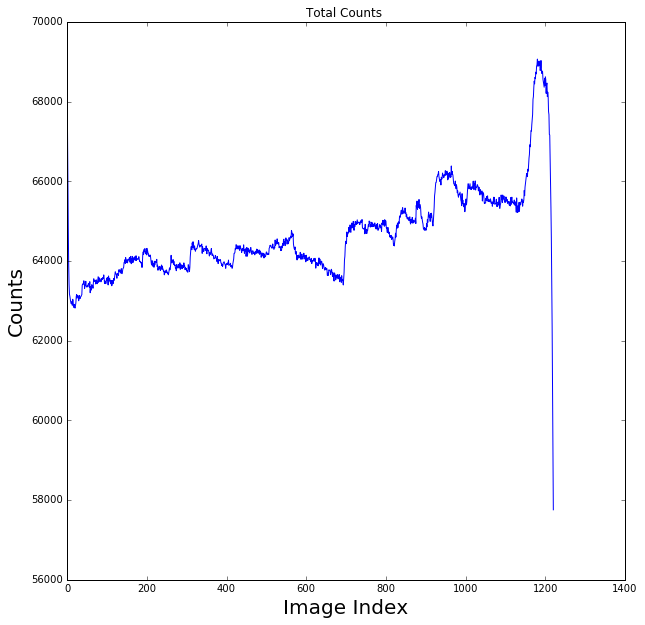

In [346]:
# display to check values
fig5 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), total_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Total Counts ")


### Select TOF file and define parameters required to calculate lambda equivalent spectra

### Offer various plots of Counts vs Lambda
     1. for each pixel
     2. for binning of pixels defined
     3. for entire images

### Display using new Ducu's method   (TO BE DEFINED)

### Calculate  for the material, the set of 'hkl' and display them on each Counts vs lambda plots

### Calculate the dominant 'hkl'
     1. for each pixel
     2. for bin of pixels